In [1]:
import pandas as pd
from riskeye.utils.data import Subject

In [2]:
sub = Subject('01')
# messages = sub.get_eyetracker_timings()
# eyepos =sub.get_eyeposition(trialwise=True)

# messages = pd.to_timedelta(messages, unit='ms').unstack('type')

In [3]:
trialwise_saccades1 = sub.get_trialwise_saccade_info(source='saccades')


In [4]:
trialwise_saccades2 = sub.get_trialwise_saccade_info(source='eyepos')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_97485/1563719013.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trialwise_saccades1['n_saccades'], )
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_97485/1563719013.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tri

<Axes: xlabel='n_saccades', ylabel='Density'>

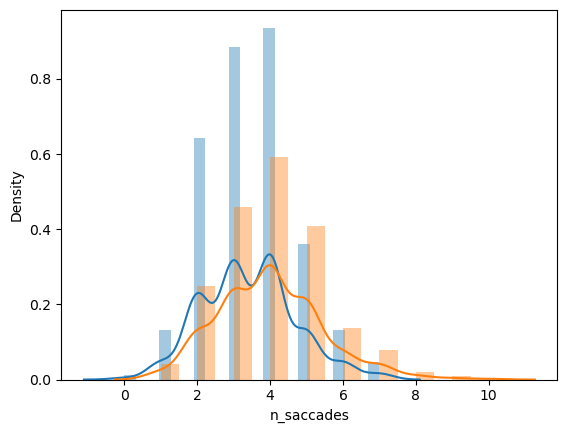

In [5]:
import seaborn as sns
sns.distplot(trialwise_saccades1['n_saccades'], )
sns.distplot(trialwise_saccades2['n_saccades'], )

In [6]:
trialwise_saccades = pd.concat((trialwise_saccades1, trialwise_saccades2), keys=['saccades', 'eyepos'], names=['source'], axis=1)

In [7]:
trialwise_saccades.groupby([('saccades', 'first_saccade'), ('eyepos', 'first_saccade')]).size() / trialwise_saccades.groupby([('saccades', 'first_saccade'), ]).size()

(saccades, first_saccade)  (eyepos, first_saccade)
left_option                left_option                0.848276
                           right_option               0.151724
right_option               left_option                0.244681
                           right_option               0.755319
dtype: float64

In [8]:
trialwise_saccades.groupby([('saccades', 'first_saccade'), ('eyepos', 'first_saccade')]).size()

(saccades, first_saccade)  (eyepos, first_saccade)
left_option                left_option                246
                           right_option                44
right_option               left_option                 46
                           right_option               142
dtype: int64

In [9]:
trialwise_saccades.corr()

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_97485/4114110111.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  trialwise_saccades.corr()


source                    saccades                                  eyepos  \
                        n_saccades left_duration right_duration n_saccades   
source                                                                       
saccades n_saccades       1.000000      0.529782       0.525632   0.784920   
         left_duration    0.529782      1.000000       0.079357   0.407567   
         right_duration   0.525632      0.079357       1.000000   0.487972   
eyepos   n_saccades       0.784920      0.407567       0.487972   1.000000   
         left_duration    0.394679      0.856585       0.053443   0.384992   
         right_duration   0.445121      0.062724       0.845681   0.515733   

source                                                
                        left_duration right_duration  
source                                                
saccades n_saccades          0.394679       0.445121  
         left_duration       0.856585       0.062724  
         right_duration      0.053443       0.845681  
eyepos   n_saccades          0.384992       0.515733  
         left_duration       1.000000       0.009253  
         right_duration      0.009253       1.000000

In [5]:
trialwise_saccades2

n_saccades first_saccade  last_saccade  \
subject run block trial                                           
01      1   1     1               7   left_option   left_option   
                  2               4  right_option  right_option   
                  3               2   left_option  right_option   
                  4               1  right_option  right_option   
                  5               1  right_option  right_option   
...                             ...           ...           ...   
        5   4     20              3   left_option  right_option   
                  21              3   left_option   left_option   
                  22              5   left_option   left_option   
                  23              2   left_option   left_option   
                  24             12   left_option   left_option   

                         left_duration  right_duration  
subject run block trial                                 
01      1   1     1             1040.0           462.0  
                  2              220.0           478.0  
                  3              168.0           232.0  
                  4                0.0           282.0  
                  5                0.0           358.0  
...                                ...             ...  
        5   4     20             512.0           300.0  
                  21            1570.0           270.0  
                  22            1176.0           230.0  
                  23            1960.0             0.0  
                  24             796.0           422.0  

[480 rows x 5 columns]

In [11]:
eyepos['fixation_n'] = eyepos.groupby(['subject', 'run', 'block', 'trial'], group_keys=False)['fixation_target'].apply(lambda x: x.ne(x.shift(1)).cumsum())

In [43]:
fixations = eyepos.groupby(['subject', 'run', 'block', 'trial', 'fixation_n', 'fixation_target']).apply(lambda d: d.iloc[-1].name[-1] - d.iloc[0].name[-1])
fixations = (fixations.dt.total_seconds() * 1000.).to_frame('duration').reset_index(['fixation_target', 'fixation_n'])

In [44]:
import numpy as np

def summarize_trial_saccades(d):
    d = d[np.in1d(d.fixation_target, ['left_option', 'right_option'])]

    durations = d.groupby('fixation_target')['duration'].sum() 
    # print(durations)

    if len(d) == 0:
        result = pd.DataFrame([{'n_saccades':0}])
    else:
        result = pd.DataFrame([{'n_saccades':len(d), 'first_saccade':d.iloc[0]['fixation_target'], 'last_saccade':d.iloc[-1]['fixation_target']}])
        result['left_duration'] = durations.loc['left_option'] if 'left_option' in durations.index else 0
        result['right_duration'] = durations.loc['right_option'] if 'right_option' in durations.index else 0

    return result


In [46]:
fixations.groupby(['subject', 'run', 'block', 'trial']).apply(summarize_trial_saccades).droplevel(-1)

n_saccades first_saccade  last_saccade  \
subject run block trial                                           
01      1   1     1               7   left_option   left_option   
                  2               4  right_option  right_option   
                  3               2   left_option  right_option   
                  4               1  right_option  right_option   
                  5               1  right_option  right_option   
...                             ...           ...           ...   
        5   4     20              3   left_option  right_option   
                  21              3   left_option   left_option   
                  22              5   left_option   left_option   
                  23              2   left_option   left_option   
                  24             12   left_option   left_option   

                         left_duration  right_duration  
subject run block trial                                 
01      1   1     1             1040.0           462.0  
                  2              220.0           478.0  
                  3              168.0           232.0  
                  4                0.0           282.0  
                  5                0.0           358.0  
...                                ...             ...  
        5   4     20             512.0           300.0  
                  21            1570.0           270.0  
                  22            1176.0           230.0  
                  23            1960.0             0.0  
                  24             796.0           422.0  

[480 rows x 5 columns]

In [45]:
summarize_trial_saccades(fixations)

,n_saccades,first_saccade,last_saccade,left_duration,right_duration
0,2446,left_option,left_option,382050.0,302304.0


In [37]:
fixations.groupby(['subject', 'run', 'block','trial']).size().describe()

count    480.000000
mean      17.468750
std        7.098109
min        4.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       49.000000
dtype: float64

In [31]:
tmp.dt.total_seconds() * 1000

subject  run  block  trial  fixation_n  fixation_target
01       1    1      1      1           fixation            84.0
                            2           center_left          4.0
                            3           left_option         16.0
                            4           center_left         18.0
                            5           left_option         54.0
                                                           ...  
         5    4      24     117         fixation             2.0
                            118         center_left          4.0
                            119         left_option          6.0
                            120         center_left        196.0
                            121         fixation           376.0
Length: 8385, dtype: float64

In [23]:
tmp.apply(lambda x: x.as_unit('s'))

AttributeError: 'Timedelta' object has no attribute 'as_unit'

In [7]:
eyepos['fixation_target'].ne(eyepos['fixation_target'].shift(1)).cumsum()

subject  run  block  trial  time                  
01       1    1      1      0 days 00:13:33.490000        1
                            0 days 00:13:33.492000        1
                            0 days 00:13:33.494000        1
                            0 days 00:13:33.496000        1
                            0 days 00:13:33.498000        1
                                                      ...  
         5    4      24     0 days 01:03:49.832000    26799
                            0 days 01:03:49.834000    26799
                            0 days 01:03:49.836000    26799
                            0 days 01:03:49.838000    26799
                            0 days 01:03:49.840000    26799
Name: fixation_target, Length: 636293, dtype: int64

In [5]:
eyepos.ne?

Signature: eyepos.ne(other, axis='columns', level=None)
Docstring:
Get Not equal to of dataframe and other, element-wise (binary operator `ne`).

Among flexible wrappers (`eq`, `ne`, `le`, `lt`, `ge`, `gt`) to comparison
operators.

Equivalent to `==`, `!=`, `<=`, `<`, `>=`, `>` with support to choose axis
(rows or columns) and level for comparison.

Parameters
----------
other : scalar, sequence, Series, or DataFrame
    Any single or multiple element data structure, or list-like object.
axis : {0 or 'index', 1 or 'columns'}, default 'columns'
    Whether to compare by the index (0 or 'index') or columns
    (1 or 'columns').
level : int or label
    Broadcast across a level, matching Index values on the passed
    MultiIndex level.

Returns
-------
DataFrame of bool
    Result of the comparison.

See Also
--------
DataFrame.eq : Compare DataFrames for equality elementwise.
DataFrame.ne : Compare DataFrames for inequality elementwise.
DataFrame.le : Compare DataFrames for less than in

In [6]:
eyepos.iloc[5000:]

L_gaze_X
subject run time                            
01      1   0 days 00:13:38.836000     648.6
            0 days 00:13:38.838000     649.6
            0 days 00:13:38.840000     650.9
            0 days 00:13:38.842000     652.2
            0 days 00:13:38.844000     652.1
...                                      ...
        5   0 days 01:03:56.436000       NaN
            0 days 01:03:56.438000       NaN
            0 days 01:03:56.440000       NaN
            0 days 01:03:56.442000       NaN
            0 days 01:03:56.444000       NaN

[1398210 rows x 1 columns]

In [23]:
eyepos.head()

L_gaze_X  L_gaze_Y  L_pupil_size  L_vel_X  \
subject run time                                                                
01      1   0 days 00:13:28.836000       NaN       NaN           0.0      NaN   
            0 days 00:13:28.838000       NaN       NaN           0.0      NaN   
            0 days 00:13:28.840000       NaN       NaN           0.0      NaN   
            0 days 00:13:28.842000       NaN       NaN           0.0      NaN   
            0 days 00:13:28.844000       NaN       NaN           0.0      NaN   

                                    L_vel_Y null  target_x  target_y  \
subject run time                                                       
01      1   0 days 00:13:28.836000      NaN  ...       NaN       NaN   
            0 days 00:13:28.838000      NaN  ...       NaN       NaN   
            0 days 00:13:28.840000      NaN  ...       NaN       NaN   
            0 days 00:13:28.842000      NaN  ...       NaN       NaN   
            0 days 00:13:28.844000      NaN  ...       NaN       NaN   

                                    target_distance          null2  
subject run time                                                    
01      1   0 days 00:13:28.836000              NaN  .............  
            0 days 00:13:28.838000              NaN  .............  
            0 days 00:13:28.840000              NaN  .............  
            0 days 00:13:28.842000              NaN  .............  
            0 days 00:13:28.844000              NaN  .............

In [24]:
messages.head()

type                                       gfx               response  \
subject run block trial                                                 
01      1   1     1     0 days 00:13:33.490000 0 days 00:13:36.196000   
                  2     0 days 00:13:39.144000 0 days 00:13:41.325000   
                  3     0 days 00:13:44.723000 0 days 00:13:47.093000   
                  4     0 days 00:13:50.320000 0 days 00:13:52.729000   
                  5     0 days 00:13:55.908000 0 days 00:13:58.570000   

type                                       rfx  
subject run block trial                         
01      1   1     1     0 days 00:13:32.658000  
                  2     0 days 00:13:38.317000  
                  3     0 days 00:13:43.910000  
                  4     0 days 00:13:49.511000  
                  5     0 days 00:13:55.093000

In [25]:
trialwise_eyepos = []

for ix, row in messages.iterrows():
    e = eyepos.loc[(ix[0], ix[1], slice(row.gfx, row.response)), :]
    trialwise_eyepos.append(e.droplevel([0, 1]))

trialwise_eyepos = pd.concat(trialwise_eyepos, keys=messages.index)

In [1]:
trialwise_eyepos

NameError: name 'trialwise_eyepos' is not defined

In [11]:
tmp = messages.to_frame()

tmp['timestamp'] = pd.Timedelta(tmp['timestamp'].values)

ValueError: Value must be Timedelta, string, integer, float, timedelta or convertible, not ndarray

In [13]:
tmp['timestamp']

subject  run  block  trial  type    
01       1    1      1      rfx          812658
                            gfx          813490
                            response     816196
                     2      rfx          818317
                            gfx          819144
                                         ...   
         5    4      23     gfx         3821684
                            response    3824712
                     24     rfx         3826452
                            gfx         3827266
                            response    3829840
Name: timestamp, Length: 1440, dtype: int64

In [18]:
eyepos

L_gaze_X  L_gaze_Y  L_pupil_size  L_vel_X  \
subject run time                                                                
01      1   0 days 00:13:28.836000       NaN       NaN           0.0      NaN   
            0 days 00:13:28.838000       NaN       NaN           0.0      NaN   
            0 days 00:13:28.840000       NaN       NaN           0.0      NaN   
            0 days 00:13:28.842000       NaN       NaN           0.0      NaN   
            0 days 00:13:28.844000       NaN       NaN           0.0      NaN   
...                                      ...       ...           ...      ...   
        5   0 days 01:03:56.436000       NaN       NaN           0.0      NaN   
            0 days 01:03:56.438000       NaN       NaN           0.0      NaN   
            0 days 01:03:56.440000       NaN       NaN           0.0      NaN   
            0 days 01:03:56.442000       NaN       NaN           0.0      NaN   
            0 days 01:03:56.444000       NaN       NaN           0.0      NaN   

                                    L_vel_Y null  target_x  target_y  \
subject run time                                                       
01      1   0 days 00:13:28.836000      NaN  ...       NaN       NaN   
            0 days 00:13:28.838000      NaN  ...       NaN       NaN   
            0 days 00:13:28.840000      NaN  ...       NaN       NaN   
            0 days 00:13:28.842000      NaN  ...       NaN       NaN   
            0 days 00:13:28.844000      NaN  ...       NaN       NaN   
...                                     ...  ...       ...       ...   
        5   0 days 01:03:56.436000      NaN  ...       NaN       NaN   
            0 days 01:03:56.438000      NaN  ...       NaN       NaN   
            0 days 01:03:56.440000      NaN  ...       NaN       NaN   
            0 days 01:03:56.442000      NaN  ...       NaN       NaN   
            0 days 01:03:56.444000      NaN  ...       NaN       NaN   

                                    target_distance          null2  
subject run time                                                    
01      1   0 days 00:13:28.836000              NaN  .............  
            0 days 00:13:28.838000              NaN  .............  
            0 days 00:13:28.840000              NaN  .............  
            0 days 00:13:28.842000              NaN  .............  
            0 days 00:13:28.844000              NaN  .............  
...                                             ...            ...  
        5   0 days 01:03:56.436000              NaN  .............  
            0 days 01:03:56.438000              NaN  .............  
            0 days 01:03:56.440000              NaN  .............  
            0 days 01:03:56.442000              NaN  .............  
            0 days 01:03:56.444000              NaN  .............  

[1403210 rows x 10 columns]

subject  run  block  trial  type    
01       1    1      1      rfx        0 days 00:13:32.658000
                            gfx        0 days 00:13:33.490000
                            response   0 days 00:13:36.196000
                     2      rfx        0 days 00:13:38.317000
                            gfx        0 days 00:13:39.144000
                                                ...          
         5    4      23     gfx        0 days 01:03:41.684000
                            response   0 days 01:03:44.712000
                     24     rfx        0 days 01:03:46.452000
                            gfx        0 days 01:03:47.266000
                            response   0 days 01:03:49.840000
Name: timestamp, Length: 1440, dtype: timedelta64[ns]

In [12]:
e(pd.Timedelta)tmp['timestamp'].astyp

TypeError: dtype '<class 'pandas._libs.tslibs.timedeltas.Timedelta'>' not understood

In [23]:
import pandas as pd
df = pd.read_csv('/data/ds-riskeye/sourcedata/sub_01_UF/Rs01rn03.gaz.gz', delim_whitespace=True, index_col=0,
            names=['time', 'L_gaze_X', 'L_gaze_Y', 'L_pupil_size', 'L_vel_X', 'L_vel_Y', 'null', 'target_x', 'target_y', 'target_distance', 'null2'], na_values='.')

df.fillna(method='ffill')
df.index = pd.TimedeltaIndex(df.index, unit='ms')


In [42]:
df

,L_gaze_X,L_gaze_Y,L_pupil_size,L_vel_X,L_vel_Y,null,target_x,target_y,target_distance,null2,fixation_target
time,,,,,,,,,,,
0 days 00:34:33.300000,595.1,359.0,1037.0,NaN,NaN,...,-414.0,-798.0,-39.4,MAN...BLR.B.R,fixation
0 days 00:34:33.302000,594.6,359.7,1036.0,NaN,NaN,...,-428.0,-794.0,-38.8,MAN...BLR.B.R,fixation
0 days 00:34:33.304000,594.3,360.4,1036.0,NaN,NaN,...,-415.0,-783.0,-38.9,MAN...BL.TBLR,fixation
0 days 00:34:33.306000,594.1,360.4,1037.0,NaN,NaN,...,-418.0,-801.0,-38.3,MAN...BL.TBL.,fixation
0 days 00:34:33.308000,594.2,360.4,1039.0,-1.9,-8.2,...,-420.0,-789.0,-38.4,MAN...BL.TBL.,fixation
...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:43:54.296000,484.2,1332.4,944.0,11.7,-6.1,...,328.0,-1147.0,75.2,MANC...LR.BLR,left_option
0 days 00:43:54.298000,486.8,1331.5,944.0,NaN,NaN,...,320.0,-1168.0,75.0,MANC...LRT..R,left_option
0 days 00:43:54.300000,489.3,1330.5,942.0,NaN,NaN,...,295.0,-1154.0,74.6,MANC...LR.BLR,left_option


In [33]:
import numpy as np
median = df['L_gaze_X'].median()
bins = [-np.inf, median-350, median-100, median-75, median+75, median+100, median+350, np.inf]

df['fixation_target'] = pd.cut(df['L_gaze_X'], bins=bins, labels=['outside_left', 'left_option', 'center_left', 'fixation', 'center_right', 'right_option', 'outside_right'])

In [ ]:
messages = messages.unstack('type')

eyepos_per_block = []

for ix, row in messages.iterrows():
    s = saccades.loc[(ix[0], ix[1], slice(row.gfx, row.response)), :]
    saccades_per_block.append(s.droplevel([0, 1]))

saccades_per_block = pd.concat(saccades_per_block, keys=messages.index)

In [36]:
df.groupby(['fixation_target']).size()

fixation_target
outside_left       1189
left_option       75928
center_left        7945
fixation         109314
center_right       4422
right_option      60545
outside_right      3281
dtype: int64

In [24]:
df['L_gaze_X'].isnull().mean()

0.0637390687443628

<Axes: xlabel='time'>

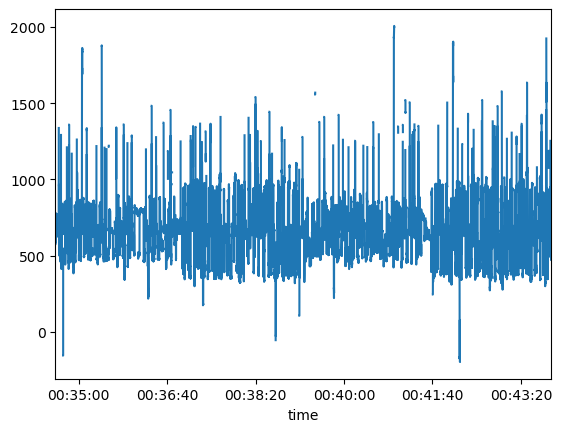

In [25]:
df['L_gaze_X'].plot()

<Axes: xlabel='time'>

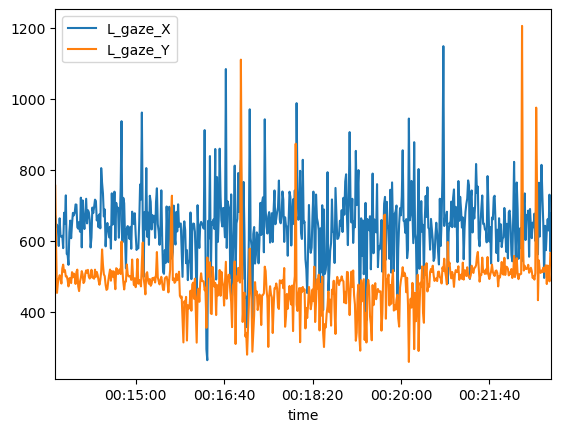

In [15]:
df[['L_gaze_X', 'L_gaze_Y']].resample('1s').mean().plot()

In [12]:
df.resample('10ms')?

SyntaxError: invalid syntax (3762898441.py, line 1)